iteration %d:loss %f 0 1.09691944027
iteration %d:loss %f 10 0.917309934387
iteration %d:loss %f 20 0.851534598751
iteration %d:loss %f 30 0.822352268534
iteration %d:loss %f 40 0.807593671048
iteration %d:loss %f 50 0.799452111977
iteration %d:loss %f 60 0.794682543764
iteration %d:loss %f 70 0.79176455501
iteration %d:loss %f 80 0.789920648715
iteration %d:loss %f 90 0.78872623605
iteration %d:loss %f 100 0.787937415912
iteration %d:loss %f 110 0.787408392628
iteration %d:loss %f 120 0.787049195401
iteration %d:loss %f 130 0.786802852206
iteration %d:loss %f 140 0.786632517048
iteration %d:loss %f 150 0.786513941749
iteration %d:loss %f 160 0.786430936628
iteration %d:loss %f 170 0.786372561596
iteration %d:loss %f 180 0.786331349242
iteration %d:loss %f 190 0.78630215937
training accuracy:%.2f 0.493333333333


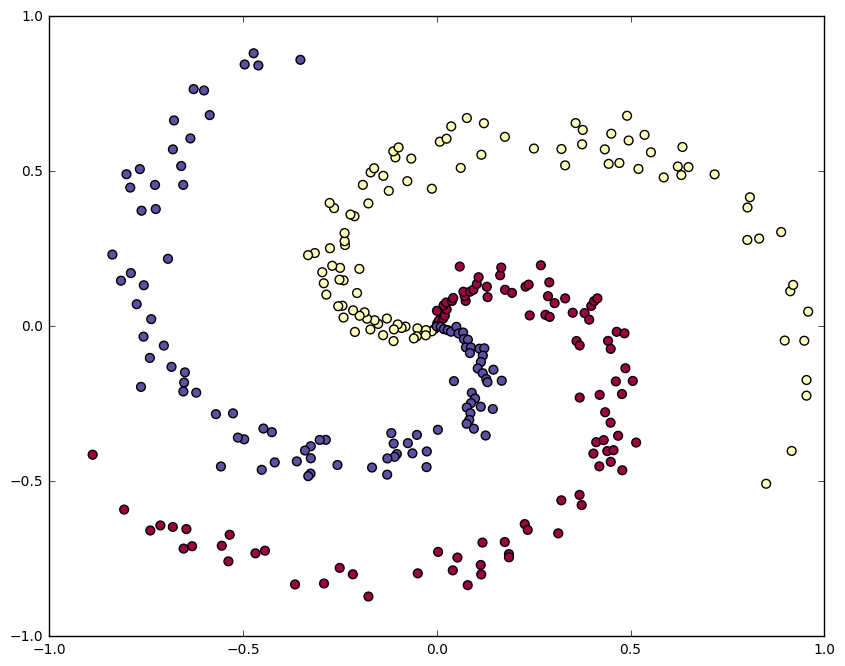

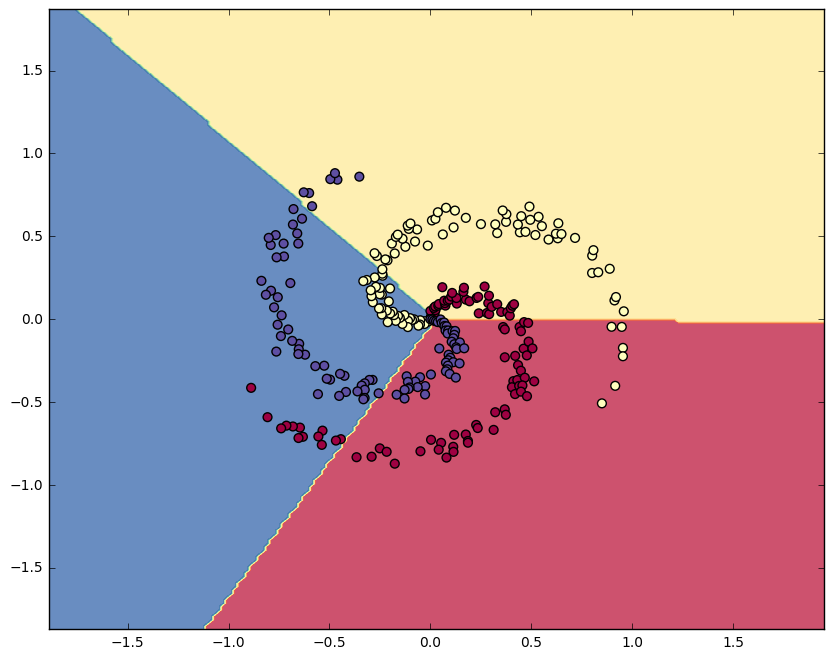

In [1]:
import numpy as np
import matplotlib.pyplot as plt #matplotlib是一个库，pyplot是其中一个模块
#%matplotlib inline 适用于在ipython notebook中进行绘图内嵌说明，由于我在Pycharm上写的，应此不需要这条以及下面的几个命令
plt.rcParams['figure.figsize'] = (10.0,8.0) #创建一个10*8大小的绘图对象
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#%load_ext autoreload
#%autoreload 2
np.random.seed(0) #用于指定随机数生成时所用算法开始的整数值，如果使用相同的seed值，则每次生成的随机数相同
N = 100 #每类有一百个点
D = 2 #每个点是二维的，即x和y值为样本的特征向量
K = 3 #总共有三类，因此总共三百个训练样本
X = np.zeros((N*K,D)) #生成一个300*2的零矩阵
y = np.zeros(N*K,dtype='uint8') #生成一个1*300的零矩阵，类型为uint8
for j in range(K): #j从0到2
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 #theta
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix] = j #给300个点分类，每一百一类，即[0，99]为0类，[100，199]为1类，以此类推
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral) #scatter画散点图；
plt.xlim([-1,1])
plt.ylim([-1,1])
#使用单层神经网络，未使用激活函数，即线性分类
w = 0.01*np.random.randn(D,K) #权值初始化，2*3，即输入两个特征向量，输出三个类别，[-0.01，0.01]
b = np.zeros((1,K)) #阈值初始化，1*3的零矩阵
step_size = 1e-0 #学习步长为1
reg = 1e-3 #正则化系数，10的负三次方
num_examples = X.shape[0] #X是300*2，shape[0]求它第一维的长度即样本个数
for i in range(200): #迭代两百次
    scores = np.dot(X,w)+b #下面是softmax分类器解释,scores为300*3
    exp_score = np.exp(scores) #为300*3
    probs = exp_score/np.sum(exp_score,axis = 1,keepdims = True) #每个点分类的得分所占概率（包括正确分类和错误分类）,#300*3
    corect_logprobs = -np.log(probs[range(num_examples),y]) #probs[range(num_examples),y]是正确分类的概率
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(w*w) #正则化项
    loss = data_loss+reg_loss
    if i%10 == 0:  #每迭代10次输出一次Loss值
        print('iteration %d:loss %f',i,loss)

    dscores = probs
    dscores[range(num_examples),y] -= 1 #Loss关于scores的偏导，为probs-1
    dscores /= num_examples

    dW = np.dot(X.T,dscores) #data_loss传递下来的梯度
    db = np.sum(dscores,axis = 0,keepdims = True)

    dW +=reg*w #再加上正则化项传递下来的梯度
    w += -step_size * dW
    b += -step_size * db

#求一下分类的准确率
scores = np.dot(X,w)+b
predicted_class = np.argmax(scores , axis=1) #predicted_class为[1,300],为每个点得分最大的所在的那个列数，即类
print ('training accuracy:%.2f',np.mean(predicted_class == y)) #mean（）是求均值
#画出分类效果
h=0.02
x_min , x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min , x_max ,h),
                     np.arange(y_min , y_max ,h))
Z = np.dot(np.c_[xx.ravel(),yy.ravel()],w) + b
Z = np.argmax(Z,axis = 1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

iteration: 0 loss: 1.09876470906
iteration: 500 loss: 0.357189797478
iteration: 1000 loss: 0.292278335004
iteration: 1500 loss: 0.265368599019
iteration: 2000 loss: 0.256587936577
iteration: 2500 loss: 0.251303824255
iteration: 3000 loss: 0.248217284715
training accuracy: 0.976666666667


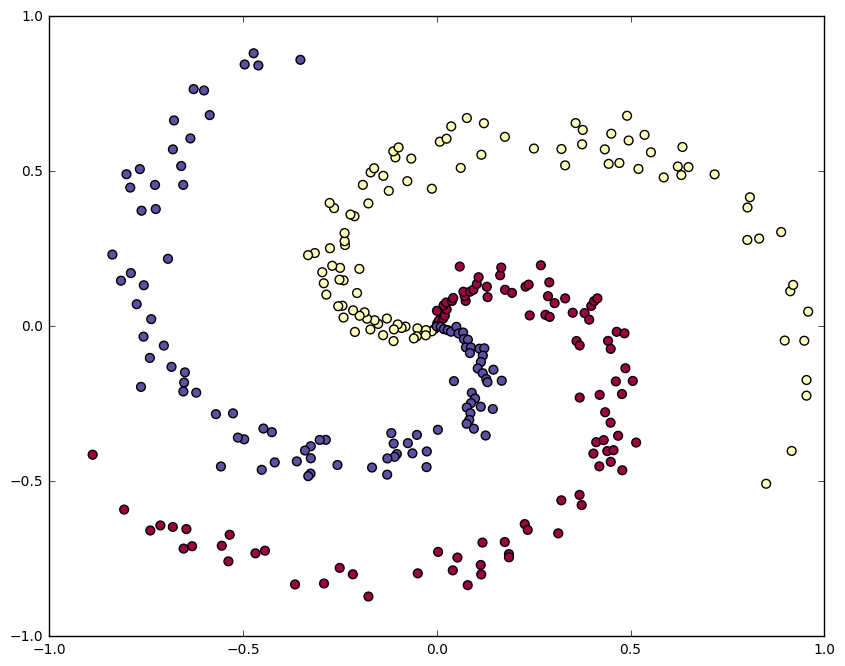

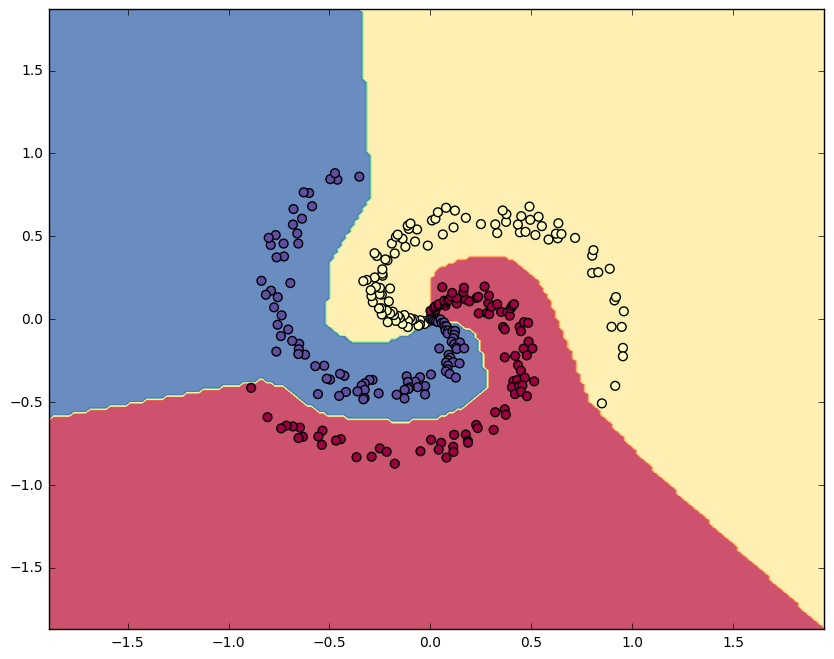

In [10]:
import numpy as np
import matplotlib.pyplot as plt #matplotlib是一个库，pyplot是其中一个模块
#%matplotlib inline 适用于在ipython notebook中进行绘图内嵌说明
plt.rcParams['figure.figsize'] = (10.0,8.0) #创建一个10*8大小的绘图对象
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#%load_ext autoreload
#%autoreload 2
np.random.seed(0) #用于指定随机数生成时所用算法开始的整数值，如果使用相同的seed值，则每次生成的随机数相同
N = 100 #每类有一百个点
D = 2 #每个点是二维的
K = 3 #总共有三类
X = np.zeros((N*K,D)) #生成一个300*2的零矩阵
y = np.zeros(N*K,dtype='uint8') #生成一个1*300的零矩阵，类型为uint8
for j in range(K): #j从0到K-1
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 #theta
    X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
    y[ix] = j #给300个点分类，每一百一类；
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral) #scatter画散点图；
plt.xlim([-1,1])
plt.ylim([-1,1])
#使用双层神经网络，使用Relu激活函数,将之前的线性分类变为非线性分类
h = 100 #隐层神经元个数
w = 0.01*np.random.randn(D,h) #D为输入层神经元个数
b = np.zeros((1,h))

w2 = 0.01*np.random.randn(h,K) #K为输出层神经元个数
b2 = np.zeros((1,K))

step_size = 1e-0 #学习步长为1
reg = 1e-3 #正则化系数，10的负三次方

num_examples = X.shape[0] #由于X是300*3矩阵，这里的shape[0]读取它第一维长度及300为样本个数

for i in range(3001): #迭代两百次
    hidden_layer = np.maximum(0,np.dot(X,w)+b) #ReLu激活函数，hidden_layer为300*100
    scores = np.dot(hidden_layer,w2) + b2

    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores,axis=1,keepdims=True)

    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5*reg*np.sum(w*w) + 0.5*reg*np.sum(w2*w2)
    loss = data_loss + reg_loss
    if i%500 == 0:  #每迭代10次输出一次Loss值
        print ("iteration:",i,"loss:",loss)

    dscores = probs
    dscores[range(num_examples), y] -= 1  # Loss关于scores的偏导，为probs-1
    dscores /= num_examples

    dw2 = np.dot(hidden_layer.T,dscores)
    db2 = np.sum(dscores,axis=0,keepdims=True)

    dhidden = np.dot(dscores,w2.T) #梯度的反向传播，dihidden是300*100
    dhidden[hidden_layer <= 0] = 0 #hidden_layer是隐层的输出值，若隐层输出为0，则对应位置的dhidden梯度为0不传播

    dw = np.dot(X.T,dhidden)
    db = np.sum(dhidden,axis=0,keepdims=True)

    dw2 += reg * w2
    dw += reg * w

    w += -step_size * dw
    w2+= -step_size * dw2
    b += -step_size * db
    b2 += -step_size * db2



#求一下准确率
hidden_layer = np.maximum(0,np.dot(X,w)+b)
scores = np.dot(hidden_layer,w2) + b2
predicted_class = np.argmax(scores,axis = 1)
print ('training accuracy:',np.mean(predicted_class == y))

h=0.02
x_min , x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1, X[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min , x_max ,h),
                     np.arange(y_min , y_max ,h))
Z = np.dot(np.maximum(0,np.dot(np.c_[xx.ravel(),yy.ravel()],w)+b),w2) + b2
Z = np.argmax(Z,axis = 1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()